In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
ev_sales = pd.read_csv("../data_for_training/BEV_data.csv")

# if "Unnamed: 0.1" in ev_sales.columns:
#     data = ev_sales.drop(["Unnamed: 0.1"], axis = 1)

ev_sales.info()
ev_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                402 non-null    int64  
 1   zip code                    402 non-null    int64  
 2   number_registration         402 non-null    int64  
 3   Population                  402 non-null    int64  
 4   household count             402 non-null    float64
 5   <10,000                     402 non-null    float64
 6   10,000~14,999               402 non-null    float64
 7   15,000~24,999               402 non-null    float64
 8   25,000~34,999               402 non-null    float64
 9   35,000~49,999               402 non-null    float64
 10  50,000~74,999               402 non-null    float64
 11  75,000~99,999               402 non-null    float64
 12  100,000~149,999             402 non-null    float64
 13  150,000~199,999             402 non

,Unnamed: 0.1,zip code,number_registration,Population,household count,"<10,000","10,000~14,999","15,000~24,999","25,000~34,999","35,000~49,999","50,000~74,999","75,000~99,999","100,000~149,999","150,000~199,999",">200,000",EV charging station number
0,0,98575,1,142,73.0,13.7,0.0,8.2,12.3,12.3,19.2,15.1,12.3,2.7,4.1,2.0
1,1,98068,10,256,108.0,0.0,0.0,2.8,0.0,13.9,24.1,7.4,39.8,12.0,0.0,11.0
2,2,98814,6,376,217.0,2.3,26.7,4.6,14.3,12.4,23.5,6.0,10.1,0.0,0.0,0.0
3,3,98638,10,1225,493.0,4.3,5.1,8.9,15.0,13.8,21.9,14.4,10.5,2.2,3.9,0.0
4,4,98605,3,1165,417.0,5.0,5.3,15.3,8.9,12.7,24.0,13.9,13.4,1.4,0.0,2.0


In [17]:
def OSR2(model, x_test, y_test, y_train): 
    y_pred = model.predict(x_test) 
    SSE = np.sum((y_test - y_pred)**2) 
    SST = np.sum((y_test - np.mean(y_train))**2) 

    return (1 - SSE/SST)

# CART BASELINE

### 1. Train, Test split

In [18]:
from sklearn.model_selection import train_test_split

y = ev_sales["number_registration"]
X = pd.get_dummies(ev_sales.drop(["number_registration"],axis=1)) 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88) 
x_train.shape, x_test.shape

((281, 15), (121, 15))

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold 

grid_values = {"ccp_alpha": np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

cv = KFold(n_splits=5, random_state=1, shuffle=True) 

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0) 
dtr_cv.fit(x_train, y_train)
print(dtr_cv)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')


[0.0 2e-05 4e-05 6.000000000000001e-05 8e-05 0.0001 0.00012000000000000002
 0.00014000000000000001 0.00016 0.00018 0.0002 0.00022
 0.00024000000000000003 0.00026000000000000003 0.00028000000000000003
 0.00030000000000000003 0.00032 0.00034 0.00036 0.00038 0.0004 0.00042
 0.00044 0.00046 0.00048000000000000007 0.0005 0.0005200000000000001
 0.00054 0.0005600000000000001 0.00058 0.0006000000000000001 0.00062
 0.00064 0.0006600000000000001 0.00068 0.0007000000000000001 0.00072
 0.0007400000000000001 0.00076 0.0007800000000000001 0.0008
 0.0008200000000000001 0.00084 0.0008600000000000001 0.00088
 0.0009000000000000001 0.00092 0.0009400000000000001 0.0009600000000000001
 0.0009800000000000002 0.001]
[0.77300723 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723
 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723
 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723
 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723 0.77300723
 0.77300723 0.77300723 0.773

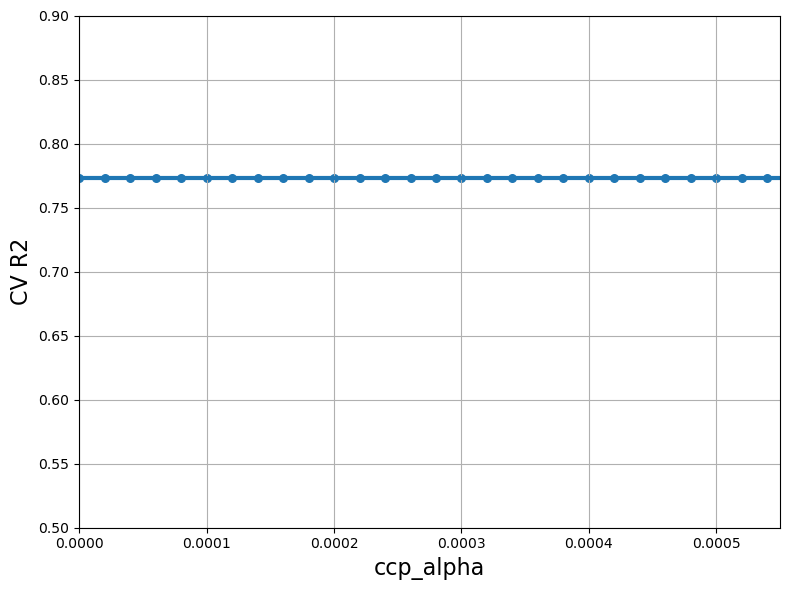

In [20]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data 
print(ccp_alpha)
R2_scores = dtr_cv.cv_results_['mean_test_score'] 
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('ccp_alpha', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.5, 0.9])

plt.tight_layout()
plt.show()

In [21]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0}


In [22]:
#Model Evaluation 

print('Cross-validated R2:', round(dtr_cv.best_score_,5))
print('OSR2:', round(OSR2(dtr_cv, x_test, y_test, y_train), 5))

Cross-validated R2: 0.77301
OSR2: 0.81185


# Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                            n_estimators = 500, random_state=88, verbose=2)

rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [24]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, x_test, y_test, y_train), 5))

OSR2: 0.90573


In [25]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,Unnamed: 0.1,9.6
1,zip code,18.3
2,Population,12.6
3,household count,19.3
4,"<10,000",0.4
5,"10,000~14,999",0.6
6,"15,000~24,999",1.2
7,"25,000~34,999",1.7
8,"35,000~49,999",4.1
9,"50,000~74,999",3.0


# Random Forest Regressor with CV

In [26]:
## Using GridSearchCV to find best max_features 

import time 

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'), 
                'min_samples_leaf': [5],
                'n_estimators': [500], 
                'random_state': [88]} 

time0 = time.time()

rf2 = RandomForestRegressor()

cv = KFold(n_splits=5, random_state=333, shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv, verbose=2) 
rf_cv.fit(x_train, y_train) 

time1 = time.time()

print('time:', round(time1-time0, 2), 's')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=5, n_e

[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]
[0.79483889 0.84823046 0.86365481 0.87212646 0.87263842 0.873925
 0.87309923 0.8742763  0.87013689 0.86865171 0.86869601 0.86723325
 0.86512199 0.86031025 0.85733013 0.85733013 0.85733013 0.85733013]


(0.7, 0.9)

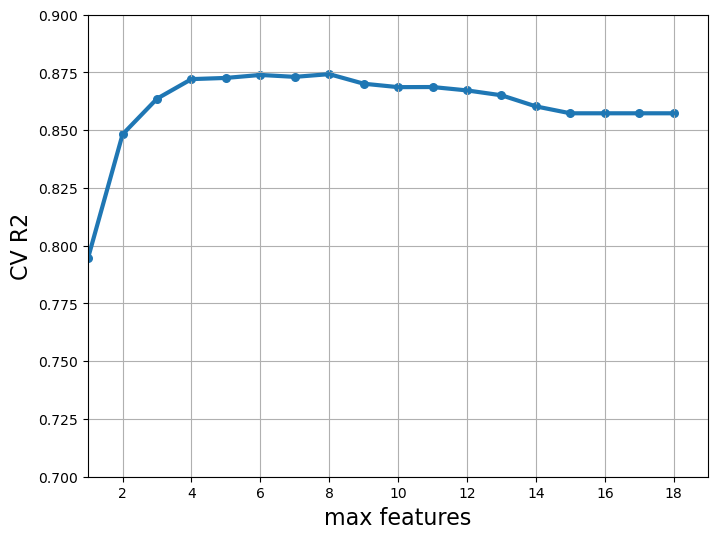

In [28]:
max_features = rf_cv.cv_results_['param_max_features'].data 
print(max_features)
R2_scores = rf_cv.cv_results_['mean_test_score']
print(R2_scores)

plt.figure(figsize=(8,6)) 
plt.xlabel('max features', fontsize=16) 
plt.ylabel('CV R2', fontsize=16) 
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.7, 0.9])

In [29]:
print(rf_cv.best_params_)

{'max_features': 8, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [30]:
# Evaluate model performance 
print('Cross-validated R2:', round(rf_cv.best_score_, 5)) 
print('OSR2:', round(OSR2(rf_cv, x_test,y_test,y_train), 5))

Cross-validated R2: 0.87428
OSR2: 0.911


In [31]:
pd.DataFrame({'Feature': x_train.columns, 
                'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,Unnamed: 0.1,6.4
1,zip code,21.4
2,Population,12.7
3,household count,20.4
4,"<10,000",0.3
5,"10,000~14,999",0.4
6,"15,000~24,999",0.7
7,"25,000~34,999",0.8
8,"35,000~49,999",2.6
9,"50,000~74,999",3.0


<BarContainer object of 15 artists>

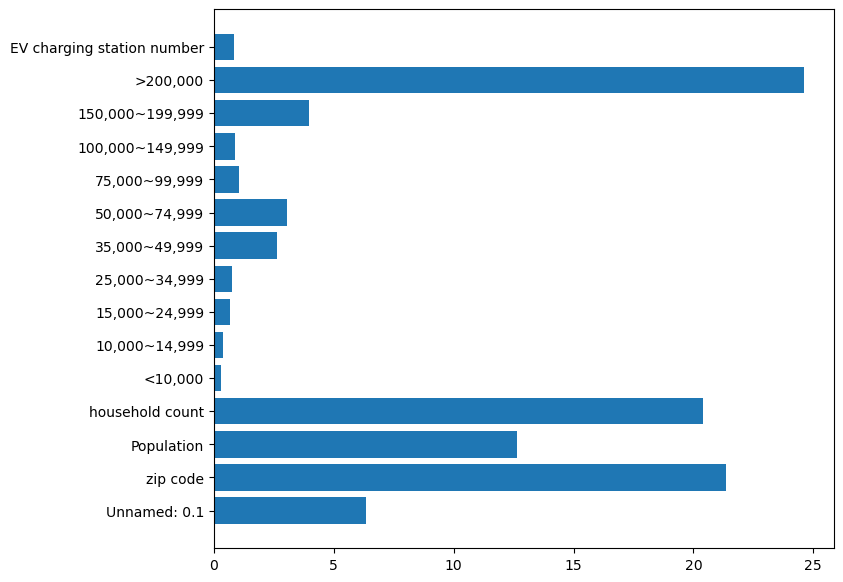

In [32]:
#visualize feature importances 

plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)